In [372]:
import warnings
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import sklearn

In [373]:
print(f'tensorflow: {tf.__version__}')
print(f'keras: {keras.__version__}')
print(f'numpy: {np.__version__}')
print(f'pandas: {pd.__version__}')
print(f'seaborn: {sns.__version__}')
print(f'matplotlib: {matplotlib.__version__}')
print(f'sklearn: {sklearn.__version__}')

tensorflow: 2.10.0
keras: 2.10.0
numpy: 1.23.2
pandas: 1.4.4
seaborn: 0.12.0
matplotlib: 3.5.3
sklearn: 1.1.2


In [374]:
df = pd.read_csv('./datasets/insurance.csv') # https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv
df[:5]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [375]:
df.info(memory_usage='deep') # cek tipe data dari setiap kolom dan ukuran file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 286.5 KB


In [376]:
df.isnull().sum() # cek jumlah nilai yang null atau NaN pada data

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Memisahkan data berdasarkan tipe data

In [377]:
numerik_df = df[df.describe().columns]
kategori_df = df.drop(columns=numerik_df.columns)

display(numerik_df)
display(kategori_df)

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


### Melihat nilai korelasi untuk setiap kolom bertipe data numeric terhadap labelnya yaitu **charges**

In [378]:
def plot_corr(data, x, y, hue, figsize=(12, 8)):
  plt.figure(figsize=figsize)

  for i, col in enumerate(data[x].drop(columns=[y]).columns):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=data, x=col, y=y, hue=hue, label=f"corr: {round(data[y].corr(data[col]), 2)}")
    plt.grid(alpha=.4)
    plt.legend()

  plt.tight_layout(w_pad=5)
  plt.show()

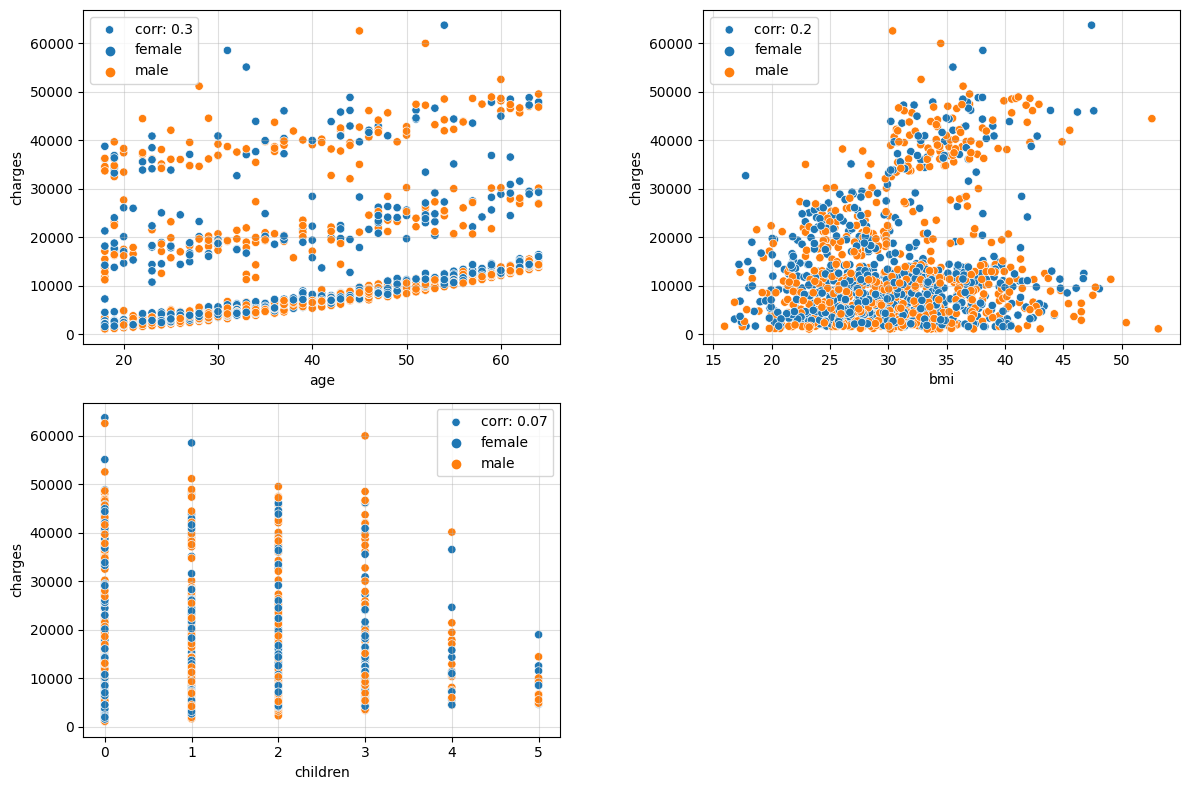


untuk mendapatkan hubungan positif yang besar antar data maka nilai korelasi harus besar atau positif, untuk range nilai korelasi di antara -1 sampai 1,  tanda minus (-) menandakan bahwa hubungan antara kedua data adalah turun, sedangkan positif (+) sebaliknya, dan untuk nol (0) artinya adalah bahwa kedua data tidak memiliki korelasi apapun.



In [379]:
plot_corr(data=df, x=numerik_df.columns, y='charges', hue='sex')
print(
'''
untuk mendapatkan hubungan positif yang besar antar data maka nilai korelasi harus besar atau positif, untuk range nilai korelasi di antara -1 sampai 1,  tanda minus (-) menandakan bahwa hubungan antara kedua data adalah turun, sedangkan positif (+) sebaliknya, dan untuk nol (0) artinya adalah bahwa kedua data tidak memiliki korelasi apapun.
''')

### Melihat hubungan antara age, smoker, sex dan region terhadap **charges**

<Figure size 1000x800 with 0 Axes>

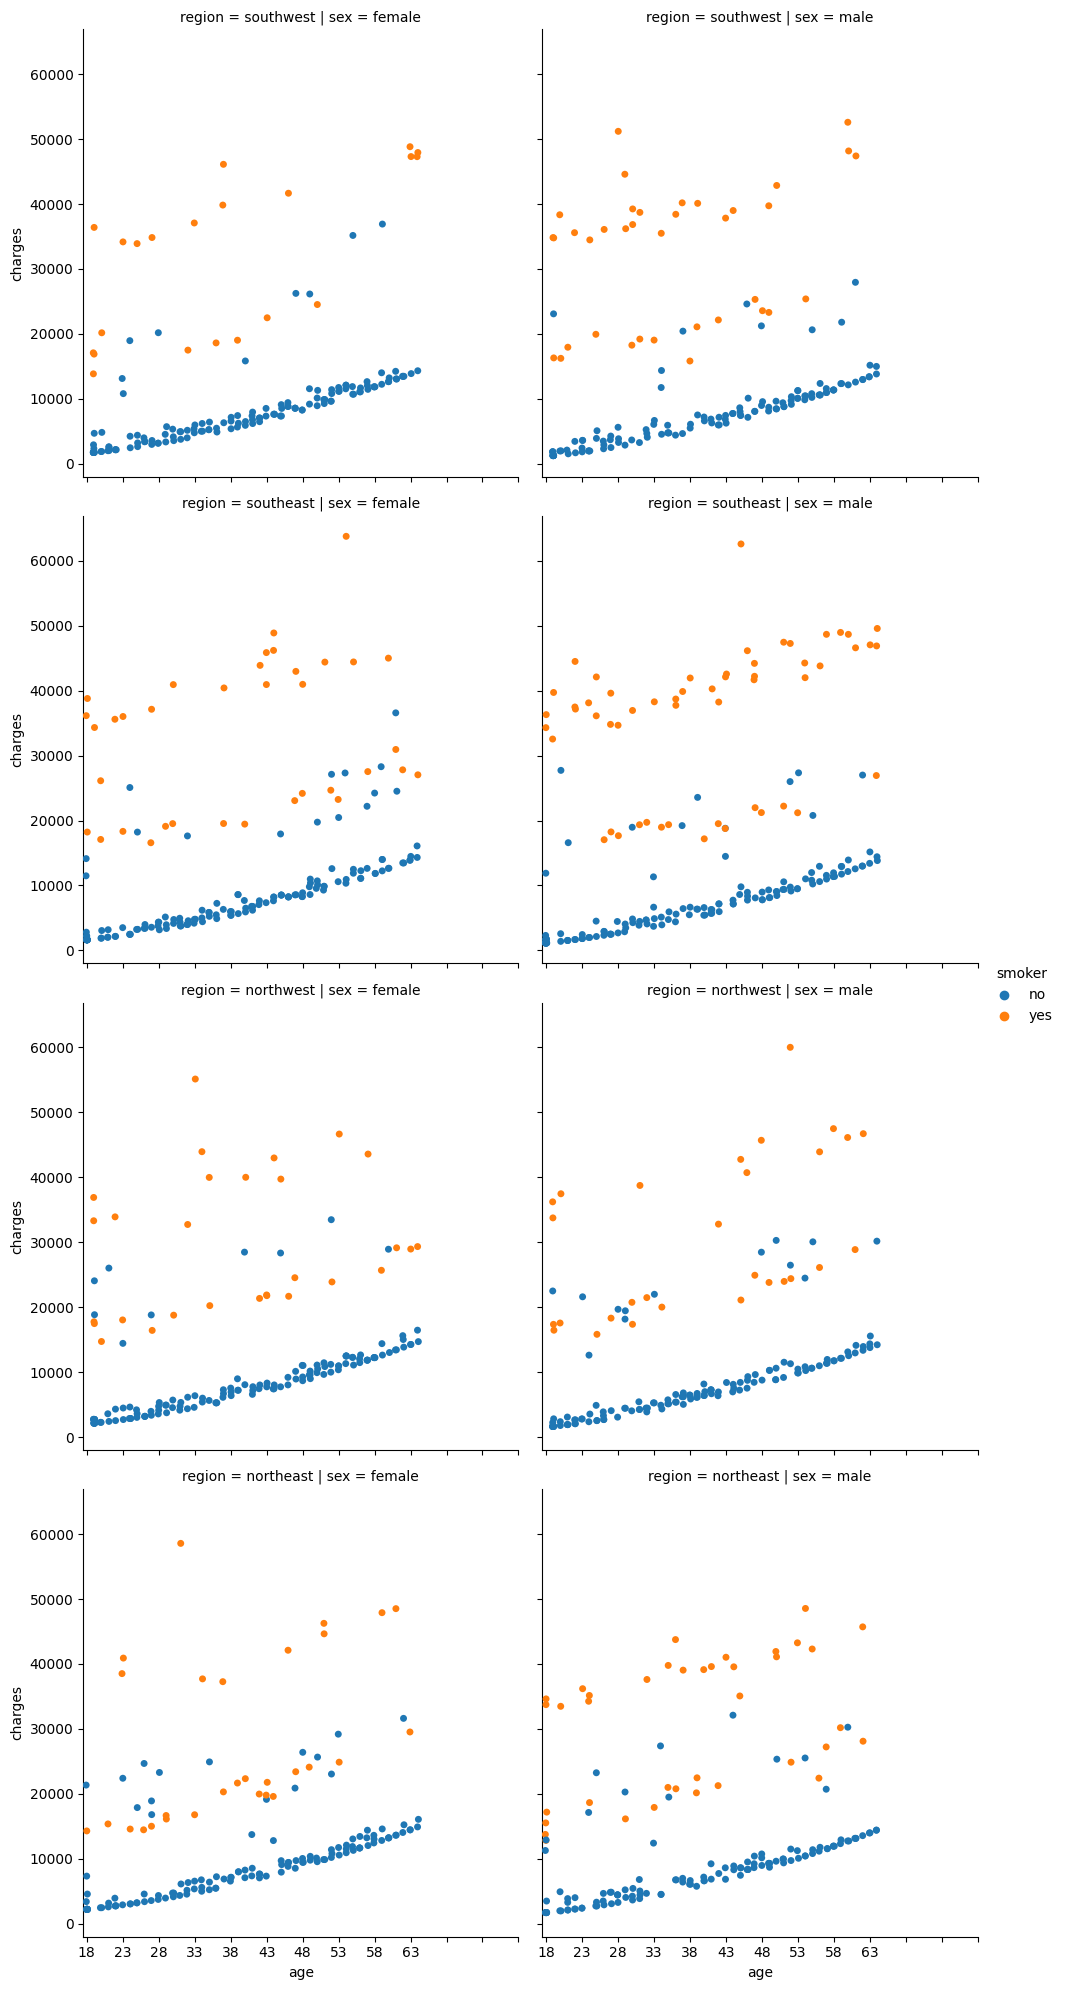


Pada catplot diatas bahwa yang memiliki hubungan positif terhadap biaya asuransi adalah smoker dan age, sedangkan untuk region dan sex tidak begitu berpengaruh hal ini dibuktikan dengan untuk setiap region grafik yang dihasilkan tidak begitu berubah atau hampir sama semua, artinya adalah bahwa harga biaya asuransi tidak begitu ditentukan dengan region, dan juga pada grafik untuk sex tidak terlalu berpengaruh artinya adalah bahwa baik anda laki-laki atau perempuan itu tidak berpengaruh dengan biaya asuransi anda.



In [380]:
plt.figure(figsize=(10, 8), dpi=100)
g = sns.catplot(data=df, x='age', y='charges', hue='smoker', col='sex', row='region')
g.set(xticks=np.arange(0, 63, 5))
plt.show()

print(
'''
Pada catplot diatas bahwa yang memiliki hubungan positif terhadap biaya asuransi adalah smoker dan age, sedangkan untuk region dan sex tidak begitu berpengaruh hal ini dibuktikan dengan untuk setiap region grafik yang dihasilkan tidak begitu berubah atau hampir sama semua, artinya adalah bahwa harga biaya asuransi tidak begitu ditentukan dengan region, dan juga pada grafik untuk sex tidak terlalu berpengaruh artinya adalah bahwa baik anda laki-laki atau perempuan itu tidak berpengaruh dengan biaya asuransi anda.
'''
)

In [381]:
df[:5]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


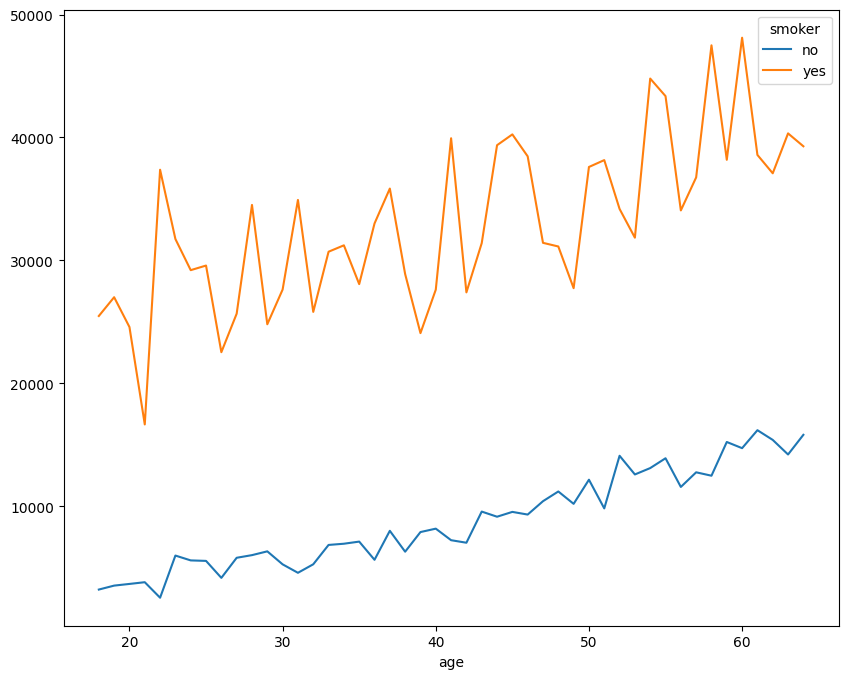

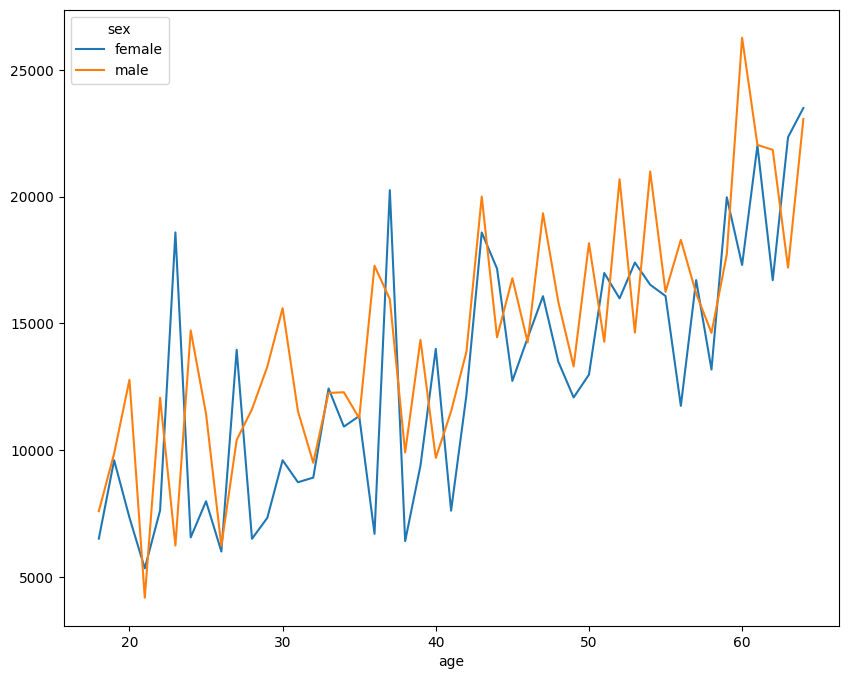

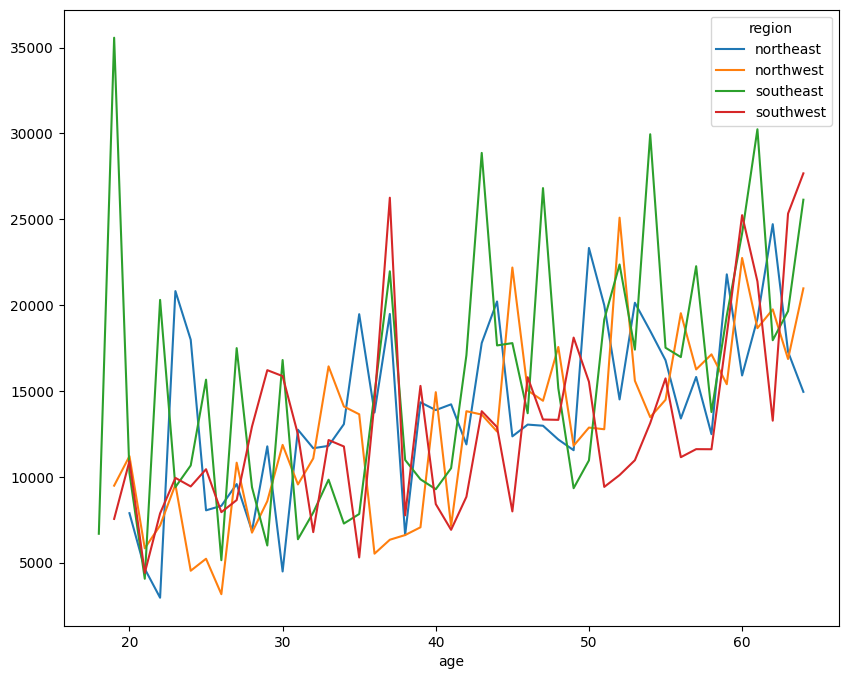

In [382]:
df.pivot_table(index='age', columns='smoker', values='charges').plot(figsize=(10, 8))
df.pivot_table(index='age', columns='sex', values='charges').plot(figsize=(10, 8))
df.pivot_table(index='age', columns='region', values='charges').plot(figsize=(10, 8))
plt.show()

berdasarkan grafik diatas bahwa yang paling berpengaruh terhadap biaya asuransi adalah perokok, bisa dilihat bahwa ada perbedaam tingkatan harga yang dialami oleh grafik tersebut

In [383]:
df['bmi_category'] = pd.cut(
    df['bmi'], 
    bins=[1, 18.5, 23, 30, 100], 
    labels=['kurus', 'normal', 'berlebih', 'obesitas']
) 
print(
'''
membuat kolom baru secara kategori mengkelompokkan berat badan berdasarkan bmi-nya dan disimpan pada kolom 'bmi_category'
''')


membuat kolom baru secara kategori mengkelompokkan berat badan berdasarkan bmi-nya dan disimpan pada kolom 'bmi_category'



In [384]:
df[:5]

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,berlebih
1,18,male,33.770,1,no,southeast,1725.55230,obesitas
2,28,male,33.000,3,no,southeast,4449.46200,obesitas
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,berlebih


### Melihat jumlah orang berdasarkan setiap region terhadap BMI-nya 

1338
1338


region,northeast,northwest,southeast,southwest
bmi_category,,,,
kurus,10,7,0,4
normal,43,31,15,27
berlebih,128,139,106,123
obesitas,143,148,243,171


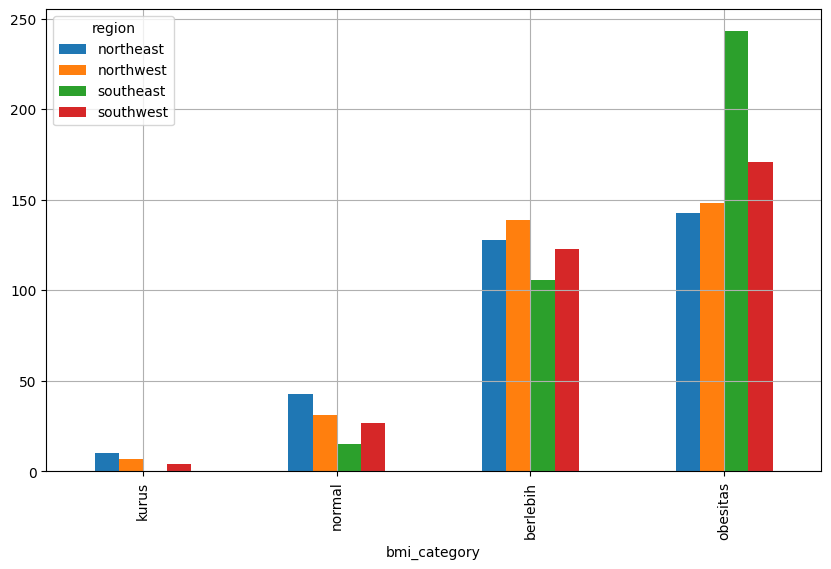

In [385]:
group_by_bmiRegion = df.pivot_table(index='bmi_category', columns='region', values='sex', aggfunc='count') #

print(sum(group_by_bmiRegion.iloc[i].sum() for i in range(len(group_by_bmiRegion.columns)))) # jumlah orang keseluruhan
print(len(df)) # untuk memastikan bahwa benar

display(group_by_bmiRegion)
group_by_bmiRegion.plot(kind='bar', figsize=(10, 6), grid=True)
plt.show()

dari grafik diatas bahwa jumlah orang yang obesitas relatih lebih banyak jika dibandingkan yang lain, terutama pada region southeast

In [386]:
group_pivot_table = df.pivot_table(index=['sex', 'smoker'], columns=['region', 'bmi_category'], values='charges') 

print(
'''
grouping berdasarkan sex dan region, dengan region dan bmi category terhadap charges untuk mendapatkan informasi seberapa berpengaruh dari perokok berdasarkan gender yang tinggal di beberapa region dengan keadaan badan mulai dari kurus sampai obesitas terhadap rata rata biaya asuransi yang dikeluarkan.
''')


grouping berdasarkan sex dan region, dengan region dan bmi category terhadap charges untuk mendapatkan informasi seberapa berpengaruh dari perokok berdasarkan gender yang tinggal di beberapa region dengan keadaan badan mulai dari kurus sampai obesitas terhadap rata rata biaya asuransi yang dikeluarkan.



In [387]:
group_pivot_table

region            northeast                                            \
bmi_category          kurus        normal      berlebih      obesitas   
sex    smoker                                                           
female no       6745.586675   7878.705489   8906.489827  10696.225618   
       yes     14731.111750  17558.892200  22881.979106  44238.125938   
male   no       6623.404633   7227.908752   8342.444333   9686.900175   
       yes     12829.455100  21842.164355  22885.739259  39715.744000   

region            northwest                                            \
bmi_category          kurus        normal      berlebih      obesitas   
sex    smoker                                                           
female no       9817.645075   5904.037140   9033.314837   9219.742892   
       yes     32734.186300  15566.119175  22697.218143  41466.293329   
male   no       3048.495513   8397.129271   7902.828336   9046.884504   
       yes              NaN  19230.160075  22171.313496  43304.353214   

region            southeast                                 southwest  \
bmi_category         normal      berlebih      obesitas         kurus   
sex    smoker                                                           
female no       6619.233475   8415.520951   8541.905587   3026.358667   
       yes     23242.323367  22336.286069  42464.135301  19023.260000   
male   no       8885.625596   6676.405132   7804.346623           NaN   
       yes     19047.692567  21574.281182  42154.677746           NaN   

region                                                   
bmi_category         normal      berlebih      obesitas  
sex    smoker                                            
female no       6334.858800   8433.860183   8570.907157  
       yes     17540.034677  19692.234800  41278.601583  
male   no       5132.905923   7909.345050   8186.222932  
       yes     15820.699000  21823.486729  40218.564200

In [388]:
long_format_PT = group_pivot_table.reset_index().melt(id_vars=['smoker', 'sex']) # ubah kedalam bentu long format agar mudah dalam melakukan plot dengan bar plot
long_format_PT[:5]

,smoker,sex,region,bmi_category,value
0,no,female,northeast,kurus,6745.586675
1,yes,female,northeast,kurus,14731.111750
2,no,male,northeast,kurus,6623.404633
3,yes,male,northeast,kurus,12829.455100
4,no,female,northeast,normal,7878.705489


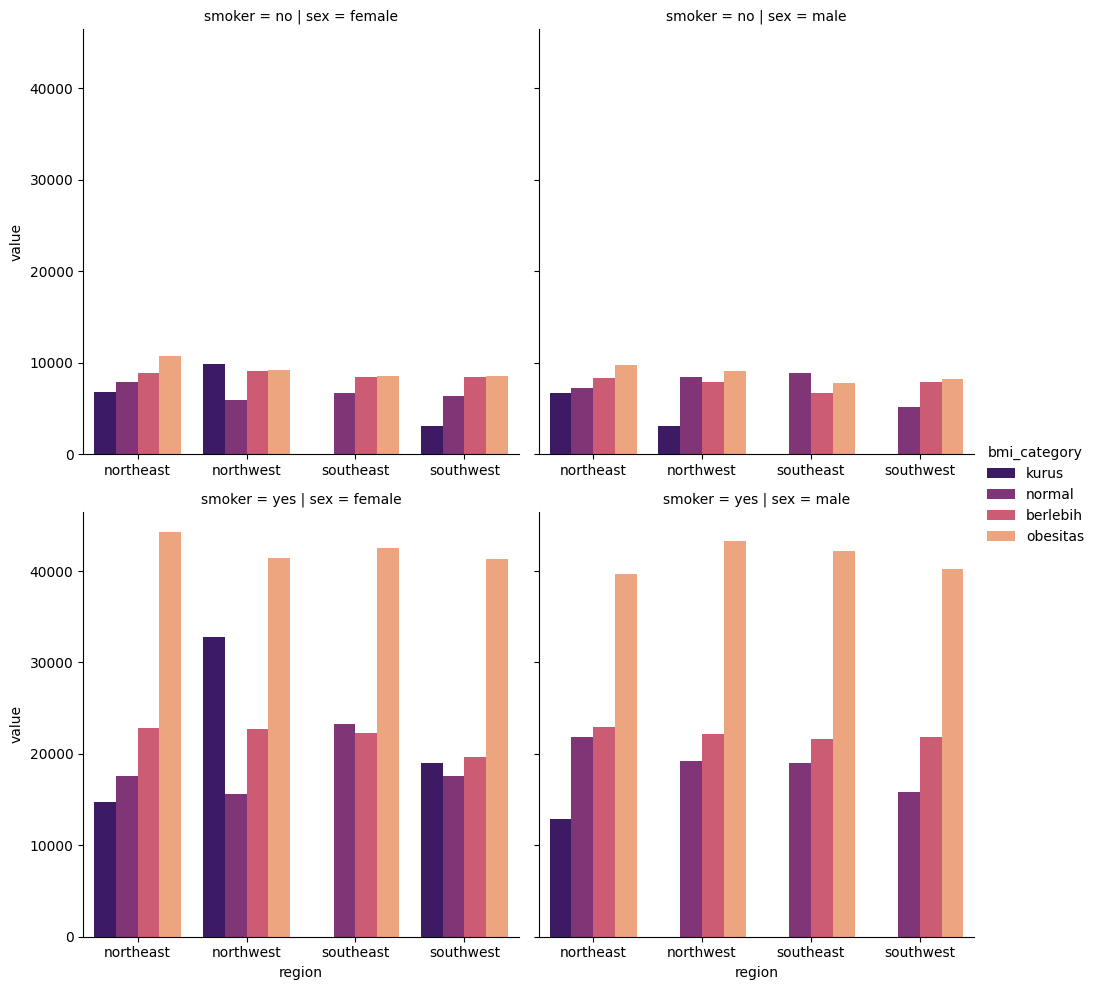

In [389]:
sns.catplot(
    data=long_format_PT, 
    x='region', 
    y='value', 
    hue='bmi_category', 
    col='sex', 
    row='smoker', 
    kind='bar', 
    sharex=False, 
    palette=plt.cm.magma.name
)
plt.show()

Dari grafik diatas menunjukkan bawah: 
1. bahwa orang yang perokok entah itu perempuan atau pun tidak mendapatkan biaya asuransi yang lebih besar jika dibandingkan dengan yang tidak merokok.
2. bahwa orang yang tinggal di region manapun tidak begitu berpengaruh dengan biaya asuransi.
3. untuk orang yang obesitas dan perokok lebih mendapatkan biaya asuransi relatih lebih mahal jika dibandingkan dengan orang yang obesitas namun tidak merokok

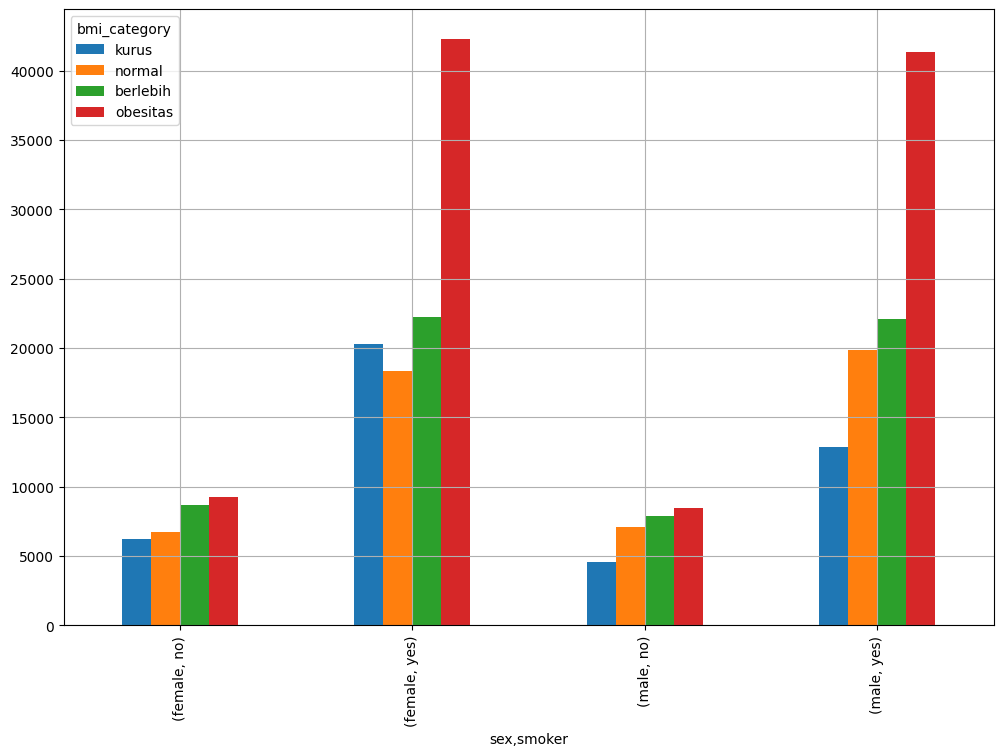

In [390]:
df.pivot_table(index='bmi_category', columns=['sex', 'smoker'], values='charges').T.plot.bar(figsize=(12, 8), grid=True)
plt.show()

hampir sama dengan grafik sebelumnya namun diampilkan dalam satu axes

In [391]:
df[:5]

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,berlebih
1,18,male,33.770,1,no,southeast,1725.55230,obesitas
2,28,male,33.000,3,no,southeast,4449.46200,obesitas
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,berlebih


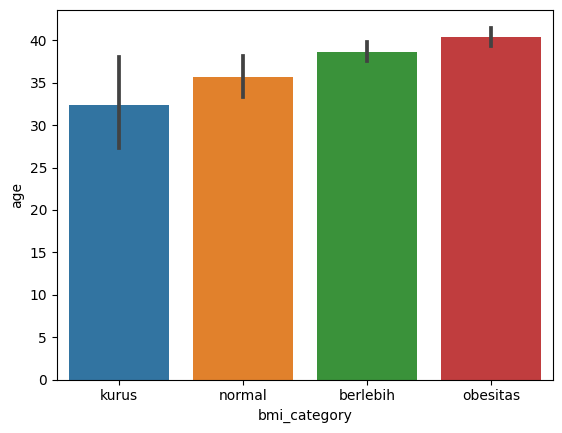

In [392]:
sns.barplot(data=df, x='bmi_category', y='age', estimator='mean')
plt.show()

rata-rata orang yang terkena obesitas di usia 40 tahun

### Preparasi Data

In [393]:
column_transformer = make_column_transformer(
    (OneHotEncoder(), kategori_df.columns),
    (MinMaxScaler(), numerik_df.drop(columns='charges').columns)
) # membuat transformer untuk memudahkan dalam proses transformasi data

pipe = Pipeline([
   ("transform", column_transformer),
   ("nan_to_num", FunctionTransformer(np.nan_to_num, validate=False)) # mengambil features name saat di transformasi
])

X = df.drop(columns=['bmi_category', 'charges'])
y = df['charges']

X_scaled = pipe.fit_transform(X) # transformasi data X

features_name = [i.split('__')[1] for i in pipe.named_steps["transform"].get_feature_names_out()] # menghilangkan nama prepocessor-nya
X_scaled_df = pd.DataFrame(X_scaled, columns=features_name) # menampilkan dalam bentuk DataFrame

X_scaled_df[:5]

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.021739,0.321227,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.479150,0.2
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.217391,0.458434,0.6
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.326087,0.181464,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.304348,0.347592,0.0


#### Membuat data training dan data test

In [394]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    random_state=42,
    test_size=.2
)

print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (1070, 11)
y_train: (1070,)
X_test: (268, 11)
y_test: (268,)


#### Tuning learning rate

In [395]:
tf.random.set_seed(42)

model = keras.Sequential([
  keras.layers.Dense(128, activation='relu', input_shape=[11]),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(1),
])

model.compile(
  loss=keras.losses.mae,
  optimizer=keras.optimizers.Adam(),
  metrics=['mse']
)

lr_schedular = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model.fit(
  X_train, 
  y_train, 
  epochs=100,
  callbacks=[lr_schedular]
)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13345.6348 - mse: 322440608.0000 - lr: 1.0000e-04
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13345.2725 - mse: 322431360.0000 - lr: 1.1220e-04
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13344.7266 - mse: 322417312.0000 - lr: 1.2589e-04
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13343.8789 - mse: 322395200.0000 - lr: 1.4125e-04
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13342.5430 - mse: 322360288.0000 - lr: 1.5849e-04
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13340.3906 - mse: 322302848.0000 - lr: 1.7783e-04
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 13336.8057 - mse: 322207232.0000 - lr: 1.9953e-04
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 13330.7217 - mse: 322043808.0000 - lr: 2.2387e-04
Epoch 9/100
34/3

<AxesSubplot:>

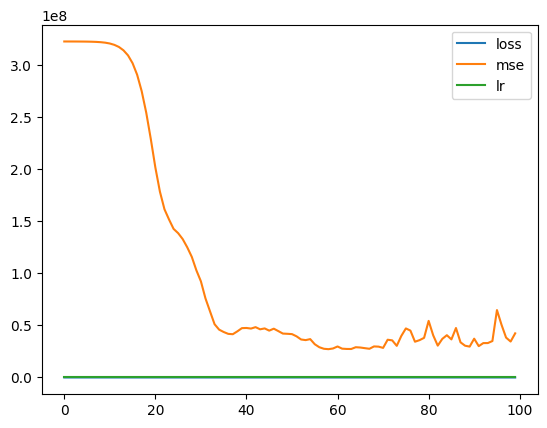

In [396]:
pd.DataFrame(history.history).plot()

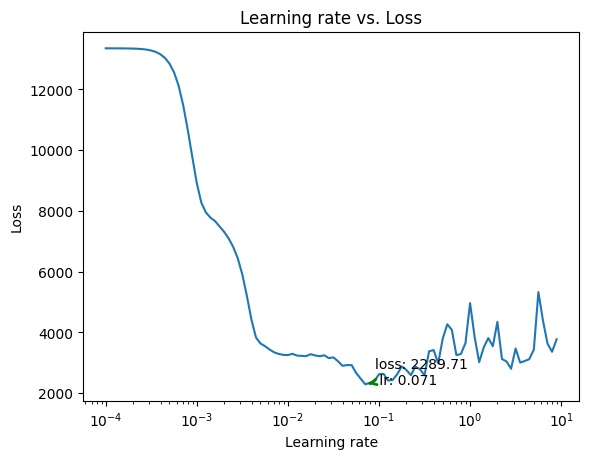

In [397]:
lrs =  1e-4 * (10**(tf.range(100) / 20)) # samakan dengan epochs pada proses fitting
loss = np.array(history.history['loss'])

history_lr = pd.DataFrame(np.c_[lrs, np.array(history.history['loss'])])
x_lr, y_loss = history_lr.iloc[np.argmin(loss)] 

plt.semilogx(lrs, loss)
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss')

plt.annotate(
    f"loss: {round(y_loss, 2)}\n lr: {round(x_lr, 3)}", 
    xy=(x_lr, y_loss), 
    xytext=(x_lr+0.02, y_loss), 
    arrowprops=dict(arrowstyle="->", 
    color="green", 
    lw=2,
   )
)

plt.show()

In [405]:
tf.random.set_seed(42)

model = keras.Sequential([
  keras.layers.Dense(128, activation='relu', input_shape=[11]),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(1),
])

model.compile(
  loss=keras.losses.mae,
  optimizer=keras.optimizers.Adam(learning_rate=0.05), # menggunanakan lr = 0.05 berdasarkan grafik untuk tuning lr
  metrics=['mae']
)

history = model.fit(
  X_train, 
  y_train, 
  epochs=35,
)

Epoch 1/35
34/34 [==============================] - 0s 1ms/step - loss: 9882.8311 - mae: 9882.8311
Epoch 2/35
34/34 [==============================] - 0s 1ms/step - loss: 5433.6245 - mae: 5433.6245
Epoch 3/35
34/34 [==============================] - 0s 1ms/step - loss: 3610.0159 - mae: 3610.0159
Epoch 4/35
34/34 [==============================] - 0s 2ms/step - loss: 3404.7217 - mae: 3404.7217
Epoch 5/35
34/34 [==============================] - 0s 1ms/step - loss: 3295.6787 - mae: 3295.6787
Epoch 6/35
34/34 [==============================] - 0s 2ms/step - loss: 3313.7915 - mae: 3313.7915
Epoch 7/35
34/34 [==============================] - 0s 1ms/step - loss: 3164.8911 - mae: 3164.8911
Epoch 8/35
34/34 [==============================] - 0s 1ms/step - loss: 3104.4207 - mae: 3104.4207
Epoch 9/35
34/34 [==============================] - 0s 1ms/step - loss: 2944.1575 - mae: 2944.1575
Epoch 10/35
34/34 [==============================] - 0s 1ms/step - loss: 2782.3445 - mae: 2782.3445
Epoch 11/

In [406]:
model.evaluate(X_test, y_test) # evaluasi model

9/9 [==============================] - 0s 1ms/step - loss: 1850.2496 - mae: 1850.2496


[1850.2496337890625, 1850.2496337890625]

#### mencetak hasil prediksi kedalam grafik

9/9 [==============================] - 0s 1ms/step


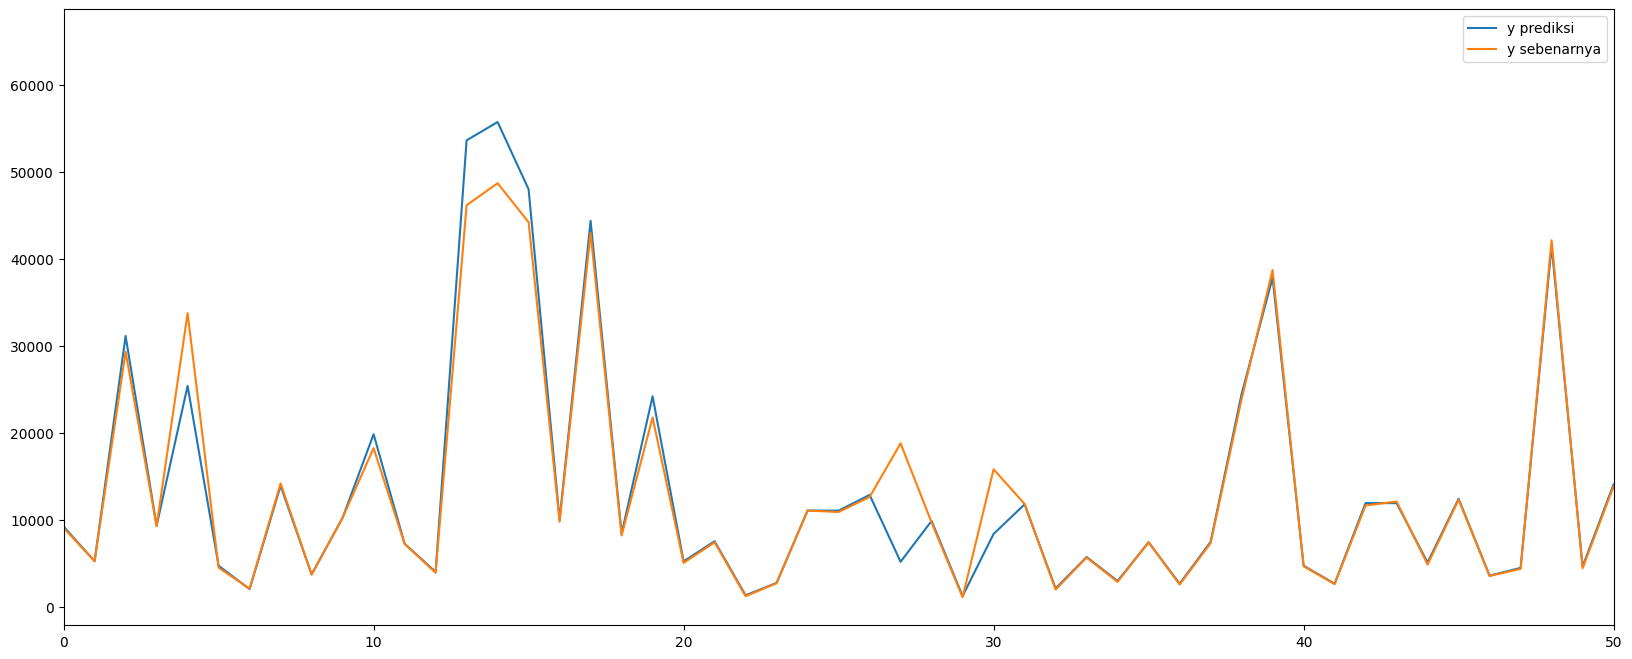

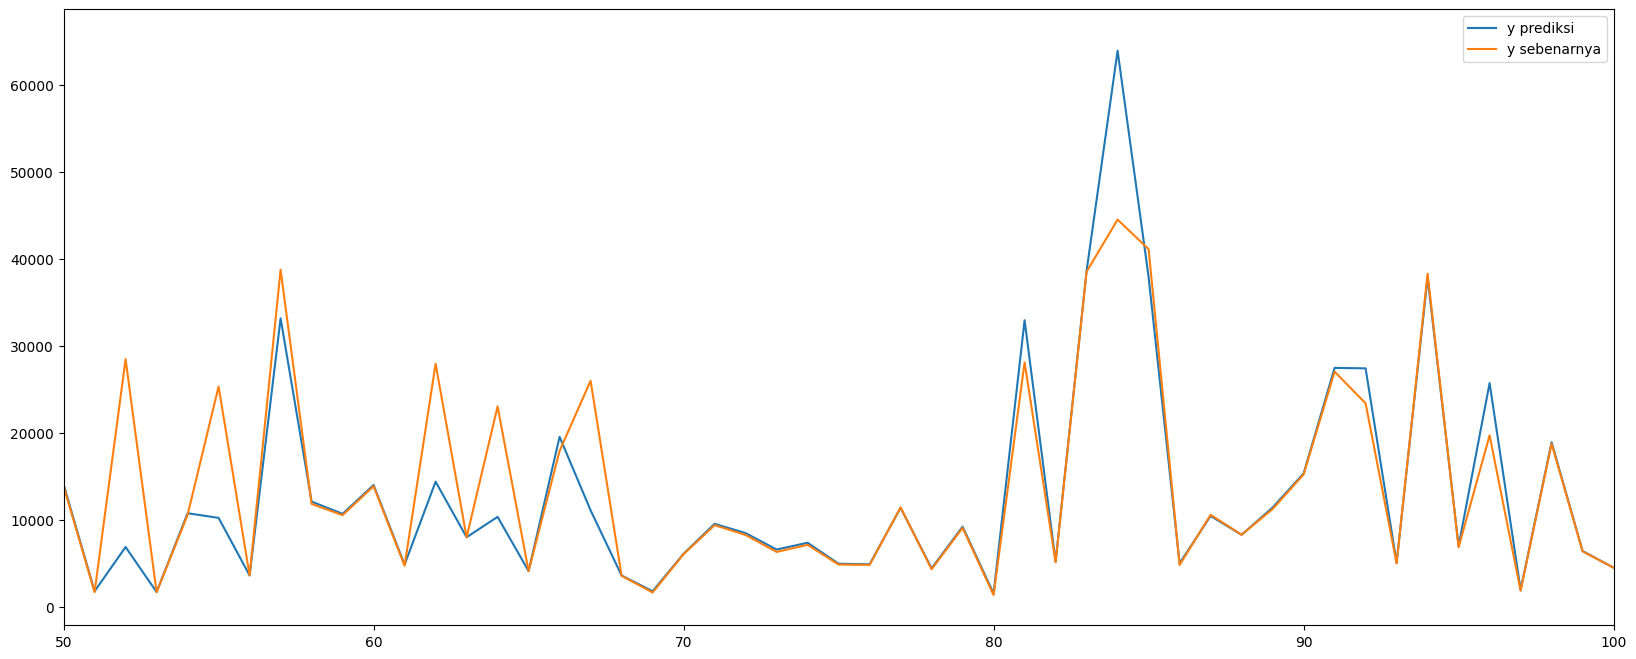

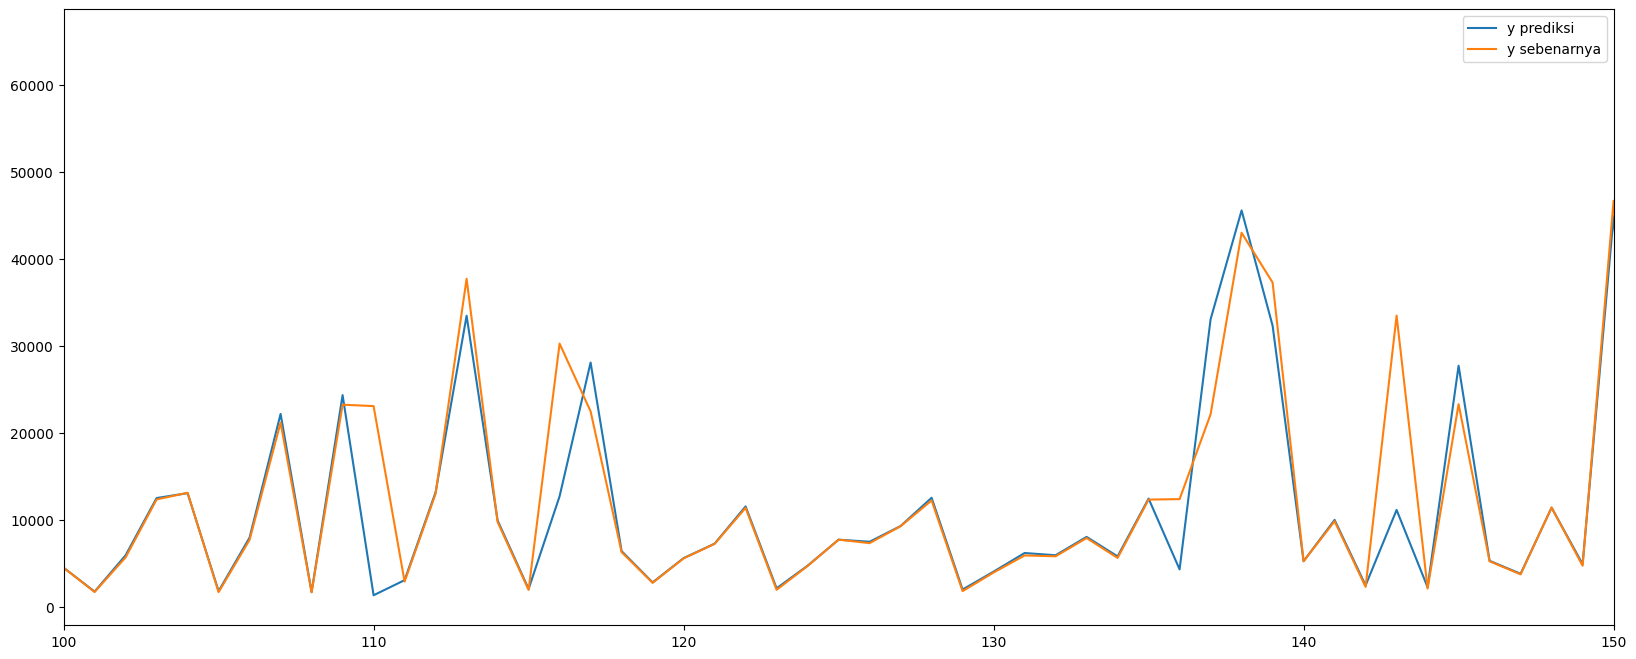

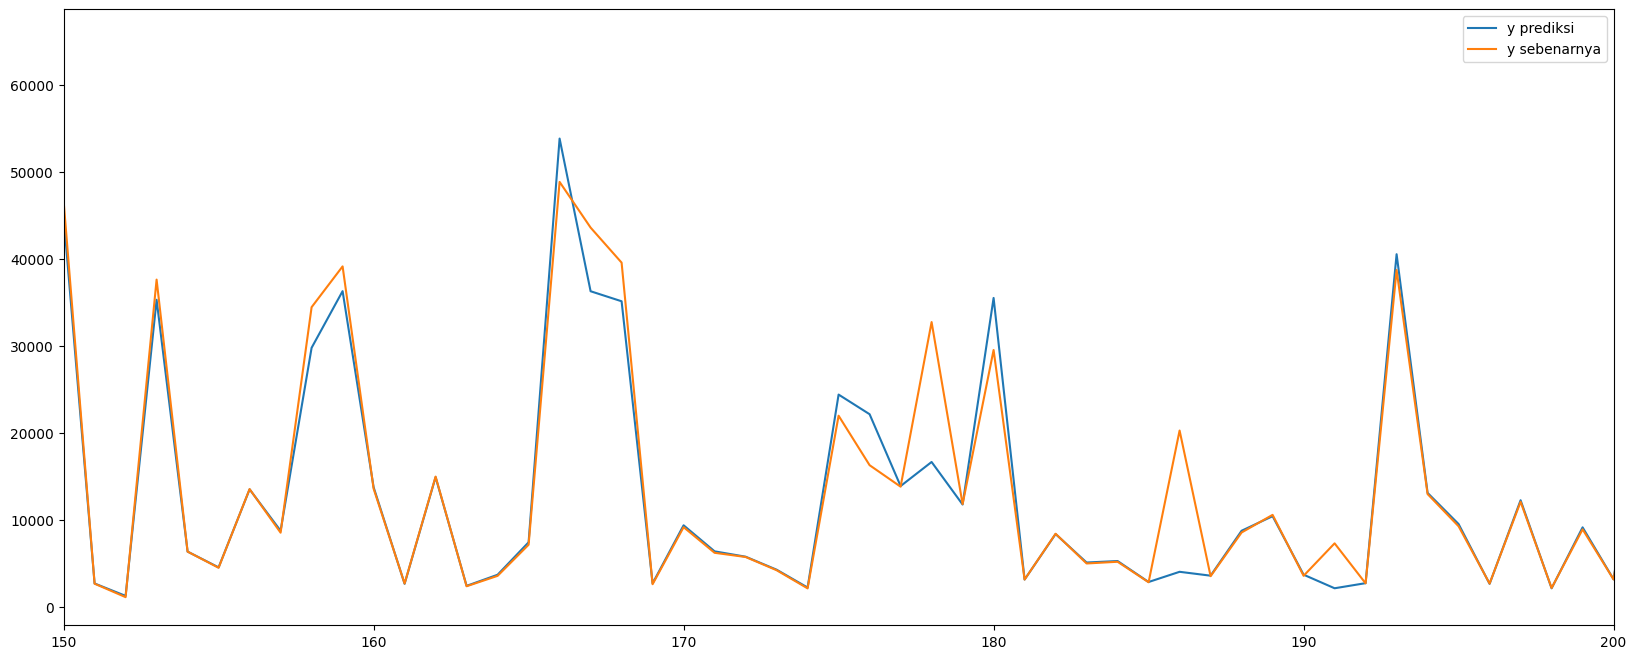

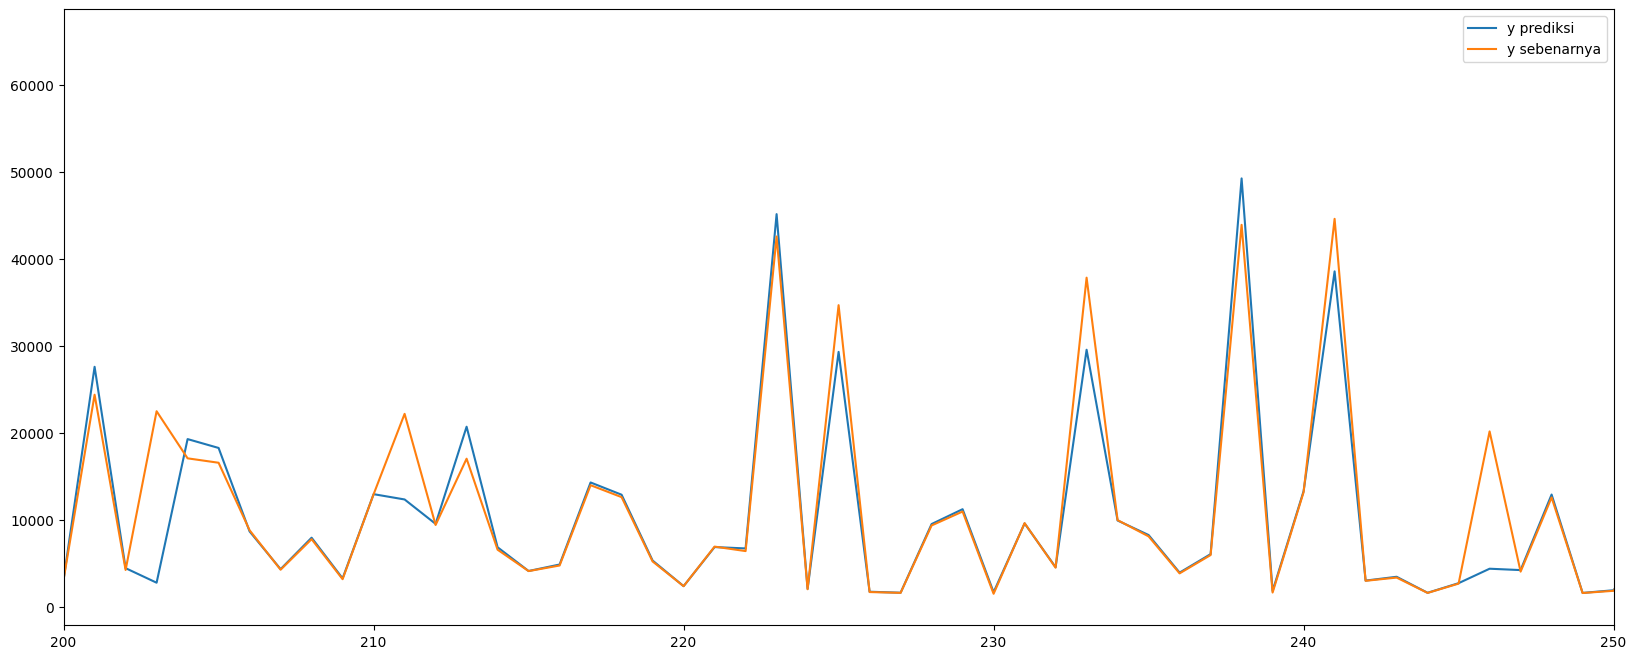

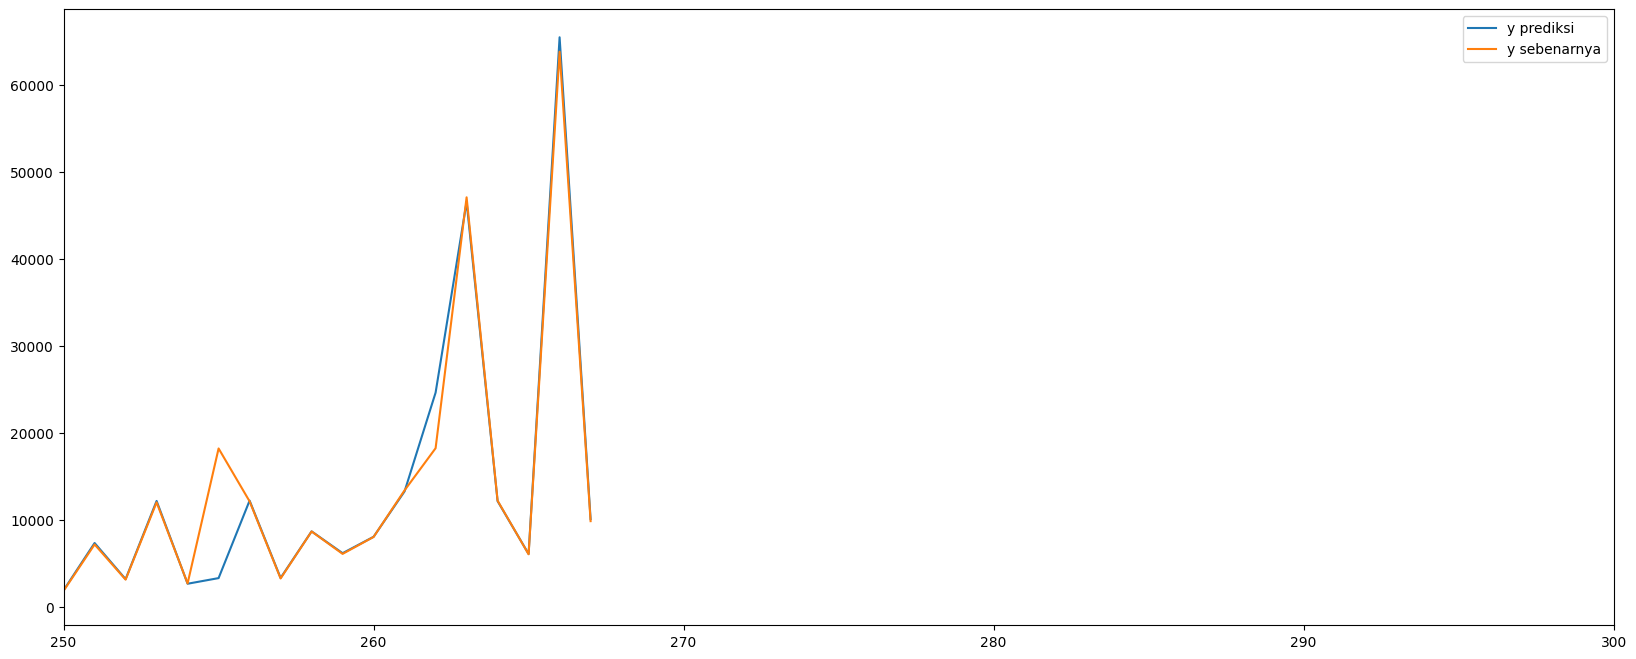

In [407]:
y_pred = model.predict(X_test)
lim = np.arange(0, len(y_pred)+50, 50)
for i in range(len(lim) - 1):
    pd.DataFrame(np.append(y_pred, y_test.values.reshape(-1, 1), axis=1), columns=['y prediksi', 'y sebenarnya']).plot(figsize=(20, 8), xlim=(lim[i], lim[i+1]))
